In [2]:
!pip install matplotlib

In [3]:
!pip install tensorflow


In [4]:
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt 

In [6]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset", "dataset", "Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

Current Working Directory: c:\Users\Admin\Documents\potato disease project\dataset


In [7]:
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset", "Train")

In [1]:
import os

train_path = r"C:\Users\Admin\Documents\potato disease project\dataset\Train"  # Use raw string (r"")

print("Train Path:", train_path)
print("Does Train Path Exist?", os.path.exists(train_path))
print("Folders Inside Dataset:", os.listdir(r"C:\Users\Admin\Documents\potato disease project\dataset"))

Train Path: C:\Users\Admin\Documents\potato disease project\dataset\Train
Does Train Path Exist? True
Folders Inside Dataset: ['Diseases.png', 'Test', 'Train', 'trained_plant_disease_model.keras', 'Train_potato_disease.ipynb', 'Valid', 'website.py']


In [2]:
import tensorflow as tf

training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear"
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [11]:
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [3]:
import os

valid_path = r"C:\Users\Admin\Documents\potato disease project\dataset\Valid"  # Use raw string (r"")

print("Valid Path:", valid_path)
print("Does Train Path Exist?", os.path.exists(valid_path))
print("Folders Inside Dataset:", os.listdir(r"C:\Users\Admin\Documents\potato disease project\dataset"))

Valid Path: C:\Users\Admin\Documents\potato disease project\dataset\Valid
Does Train Path Exist? True
Folders Inside Dataset: ['Diseases.png', 'Test', 'Train', 'trained_plant_disease_model.keras', 'Train_potato_disease.ipynb', 'Valid', 'website.py']


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear"
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [5]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\Admin\anaconda3\envs\tfnew\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.3740 - loss: 1.6794 - val_accuracy: 0.3700 - val_loss: 1.0184
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 819ms/step - accuracy: 0.5811 - loss: 0.8772 - val_accuracy: 0.7367 - val_loss: 0.5646
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 930ms/step - accuracy: 0.6766 - loss: 0.6646 - val_accuracy: 0.6733 - val_loss: 0.6427
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 928ms/step - accuracy: 0.7652 - loss: 0.4970 - val_accuracy: 0.7400 - val_loss: 0.5728
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 884ms/step - accuracy: 0.8081 - loss: 0.4365 - val_accuracy: 0.8467 - val_loss: 0.3573
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 882ms/step - accuracy: 0.8981 - loss: 0.2470 - val_accuracy: 0.7367 - val_loss: 0.8317
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.8432 - loss: 0.3762 - val_accuracy: 0.8833 - val_loss: 0.2881
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9214 - loss: 0.2276 - val_accuracy: 0.

In [42]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.9908 - loss: 0.0441
Training accuracy: 0.9866666793823242


In [43]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.9192 - loss: 0.1542
Validation accuracy: 0.9200000166893005


In [44]:
cnn.save('trained_plant_disease_model.keras')

In [45]:
training_history.history

{'accuracy': [0.41555556654930115,
  0.6288889050483704,
  0.7155555486679077,
  0.7588889002799988,
  0.8399999737739563,
  0.8833333253860474,
  0.8677777647972107,
  0.9177777767181396,
  0.9577777981758118,
  0.9577777981758118],
 'loss': [1.2869815826416016,
  0.7928877472877502,
  0.6138582825660706,
  0.4975378215312958,
  0.3773467540740967,
  0.28710681200027466,
  0.31990867853164673,
  0.22710518538951874,
  0.13224908709526062,
  0.11228988319635391],
 'val_accuracy': [0.3700000047683716,
  0.7366666793823242,
  0.6733333468437195,
  0.7400000095367432,
  0.846666693687439,
  0.7366666793823242,
  0.8833333253860474,
  0.9200000166893005,
  0.9100000262260437,
  0.9200000166893005],
 'val_loss': [1.0183998346328735,
  0.5645832419395447,
  0.6426833868026733,
  0.5728493928909302,
  0.35725918412208557,
  0.831658124923706,
  0.2880863845348358,
  0.1785603016614914,
  0.20065441727638245,
  0.1575288474559784]}

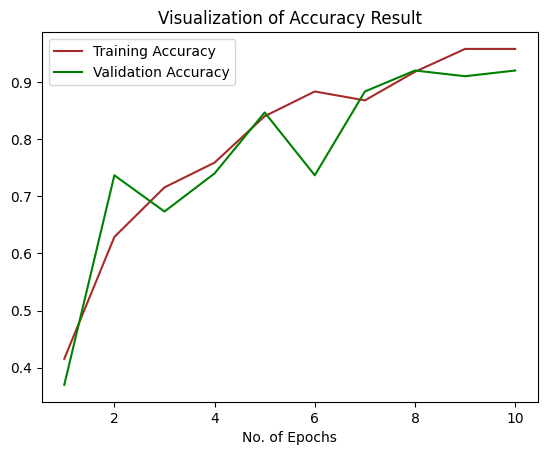

In [46]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()